<h1 style="color: white; background-color: #3498db; font-family: 'Arial', sans-serif; text-align: center; padding: 10px; border-radius: 8px;">Linear Discriminant Analysis</h1>


# Linear Discriminant Analysis

* Linear discriminant analysis (LDA) is an approach used in supervised machine learning to solve **multi-class classification** problems. 

* 

# Importing the neccessary libraries


In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [1]:
df=pd.read_csv(r"D:\Machine Learning\Machine-Learning\Data\train_abalone.csv")
df.head()

<IPython.core.display.Javascript object>

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


# Data Exploration

In [2]:
print(f"The shape of the data is: {df.shape}")
print(f"The size of the data is: {df.size}")

The shape of the data is: (90615, 10)
The size of the data is: 906150


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [4]:
df.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
if df.duplicated().sum() > 0:
    print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")
else:
    print("There are no duplicated rows in the dataset.")

There are no duplicated rows in the dataset.


In [6]:
if df.isnull().sum().any():
    print(f"There are {df.isnull().sum()} null values in the dataset.")
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


# Data Analysis

<IPython.core.display.Javascript object>

<Axes: ylabel='Rings'>

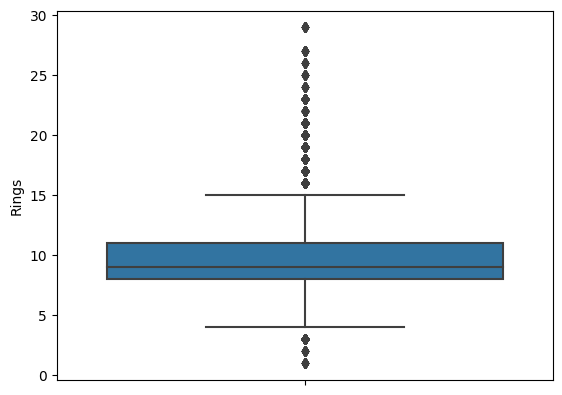

In [7]:
sns.boxplot(data=df,y="Rings")

In [9]:
df=df[(df["Rings"] >5) & (df["Rings"] < 15)]
df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9
...,...,...,...,...,...,...,...,...,...,...
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6


In [10]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>],
       [<Axes: title={'center': 'Whole weight.2'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

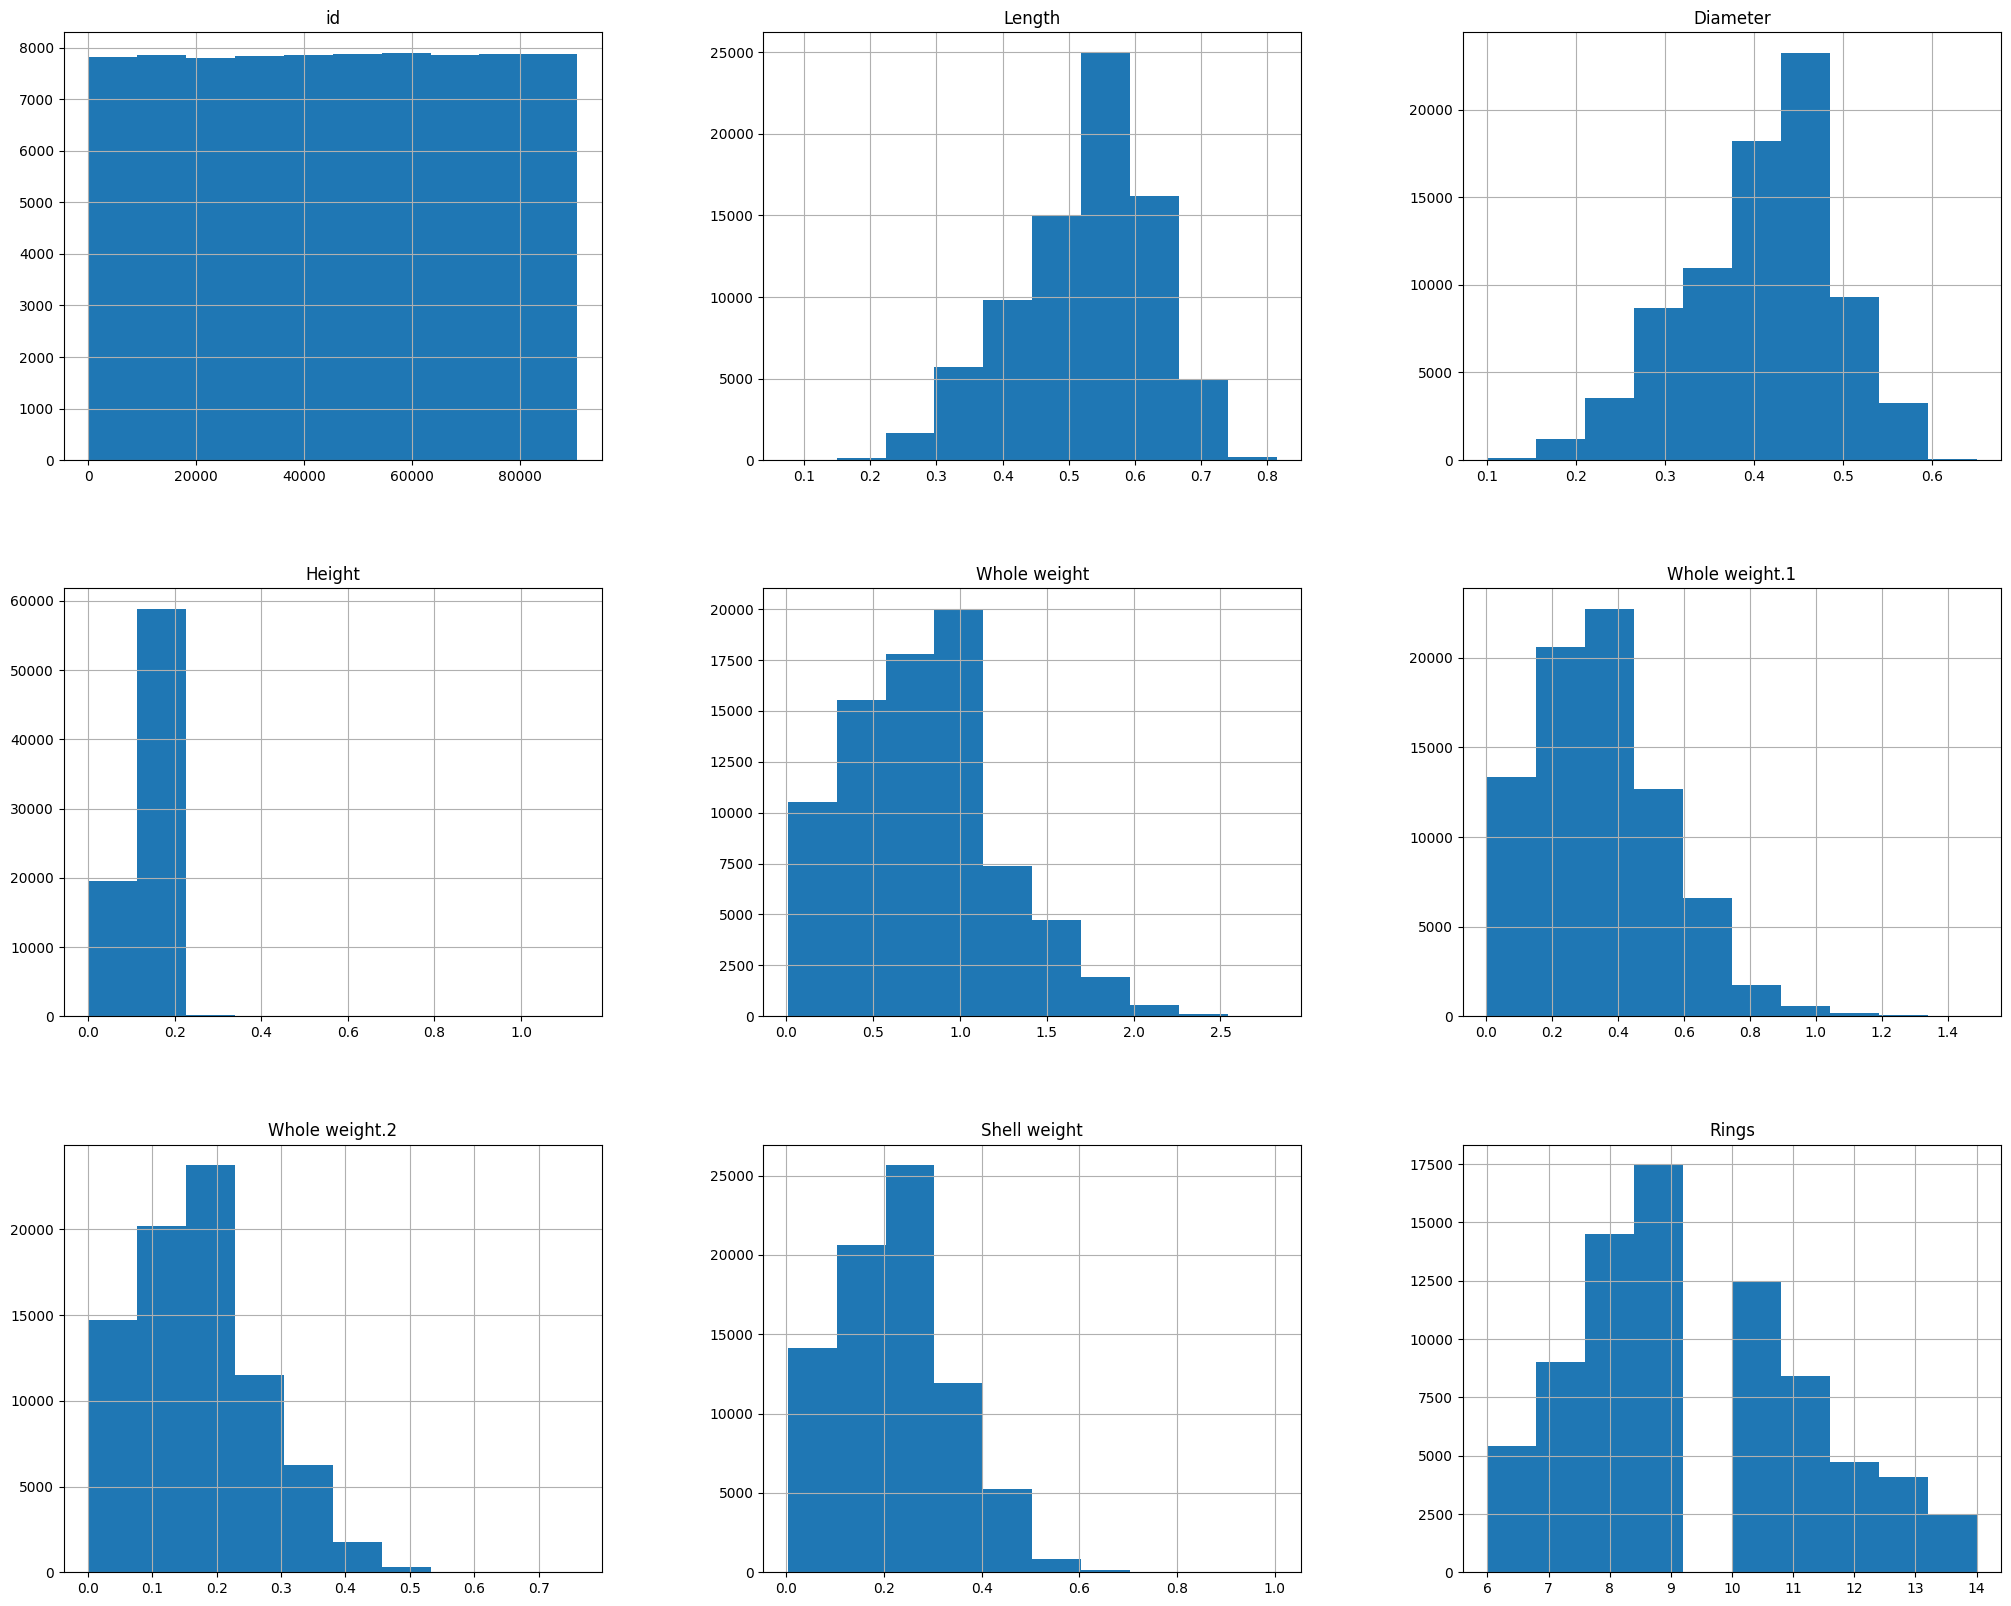

In [11]:
df.hist(figsize=(25,20))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

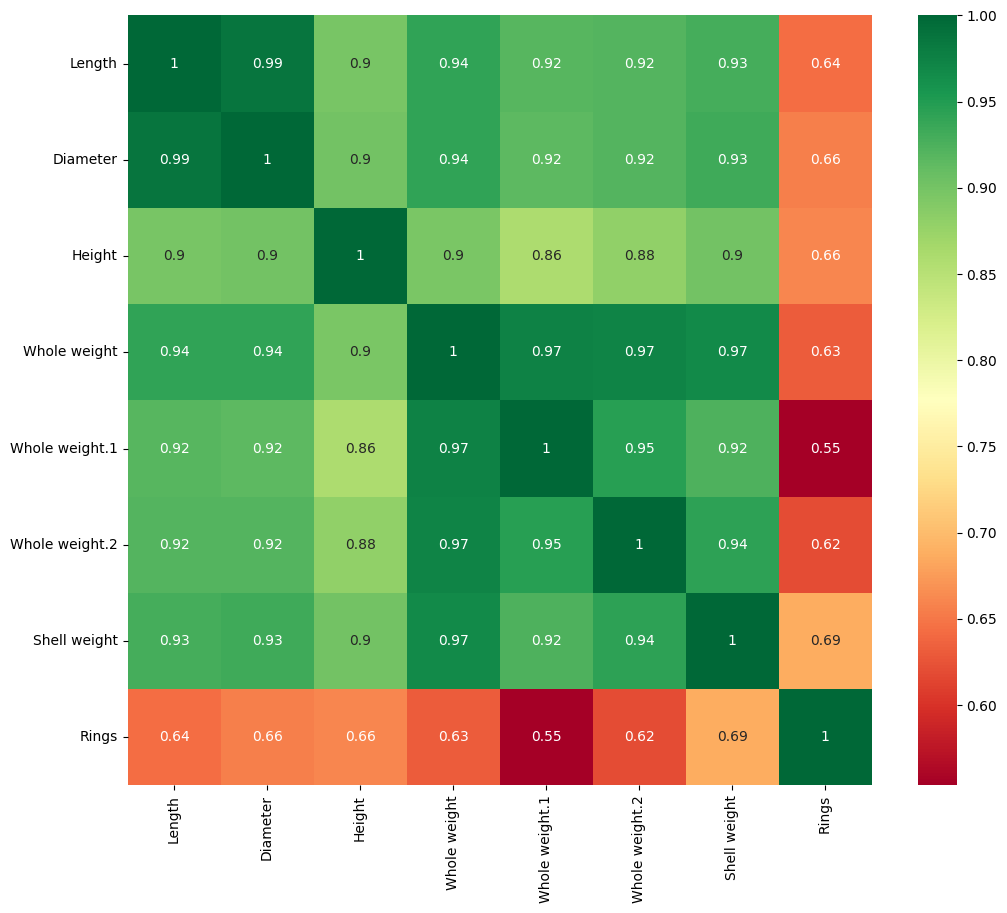

In [12]:
plt.figure(figsize=(12,10))
p=sns.heatmap(x.corr(), annot=True,cmap ='RdYlGn')

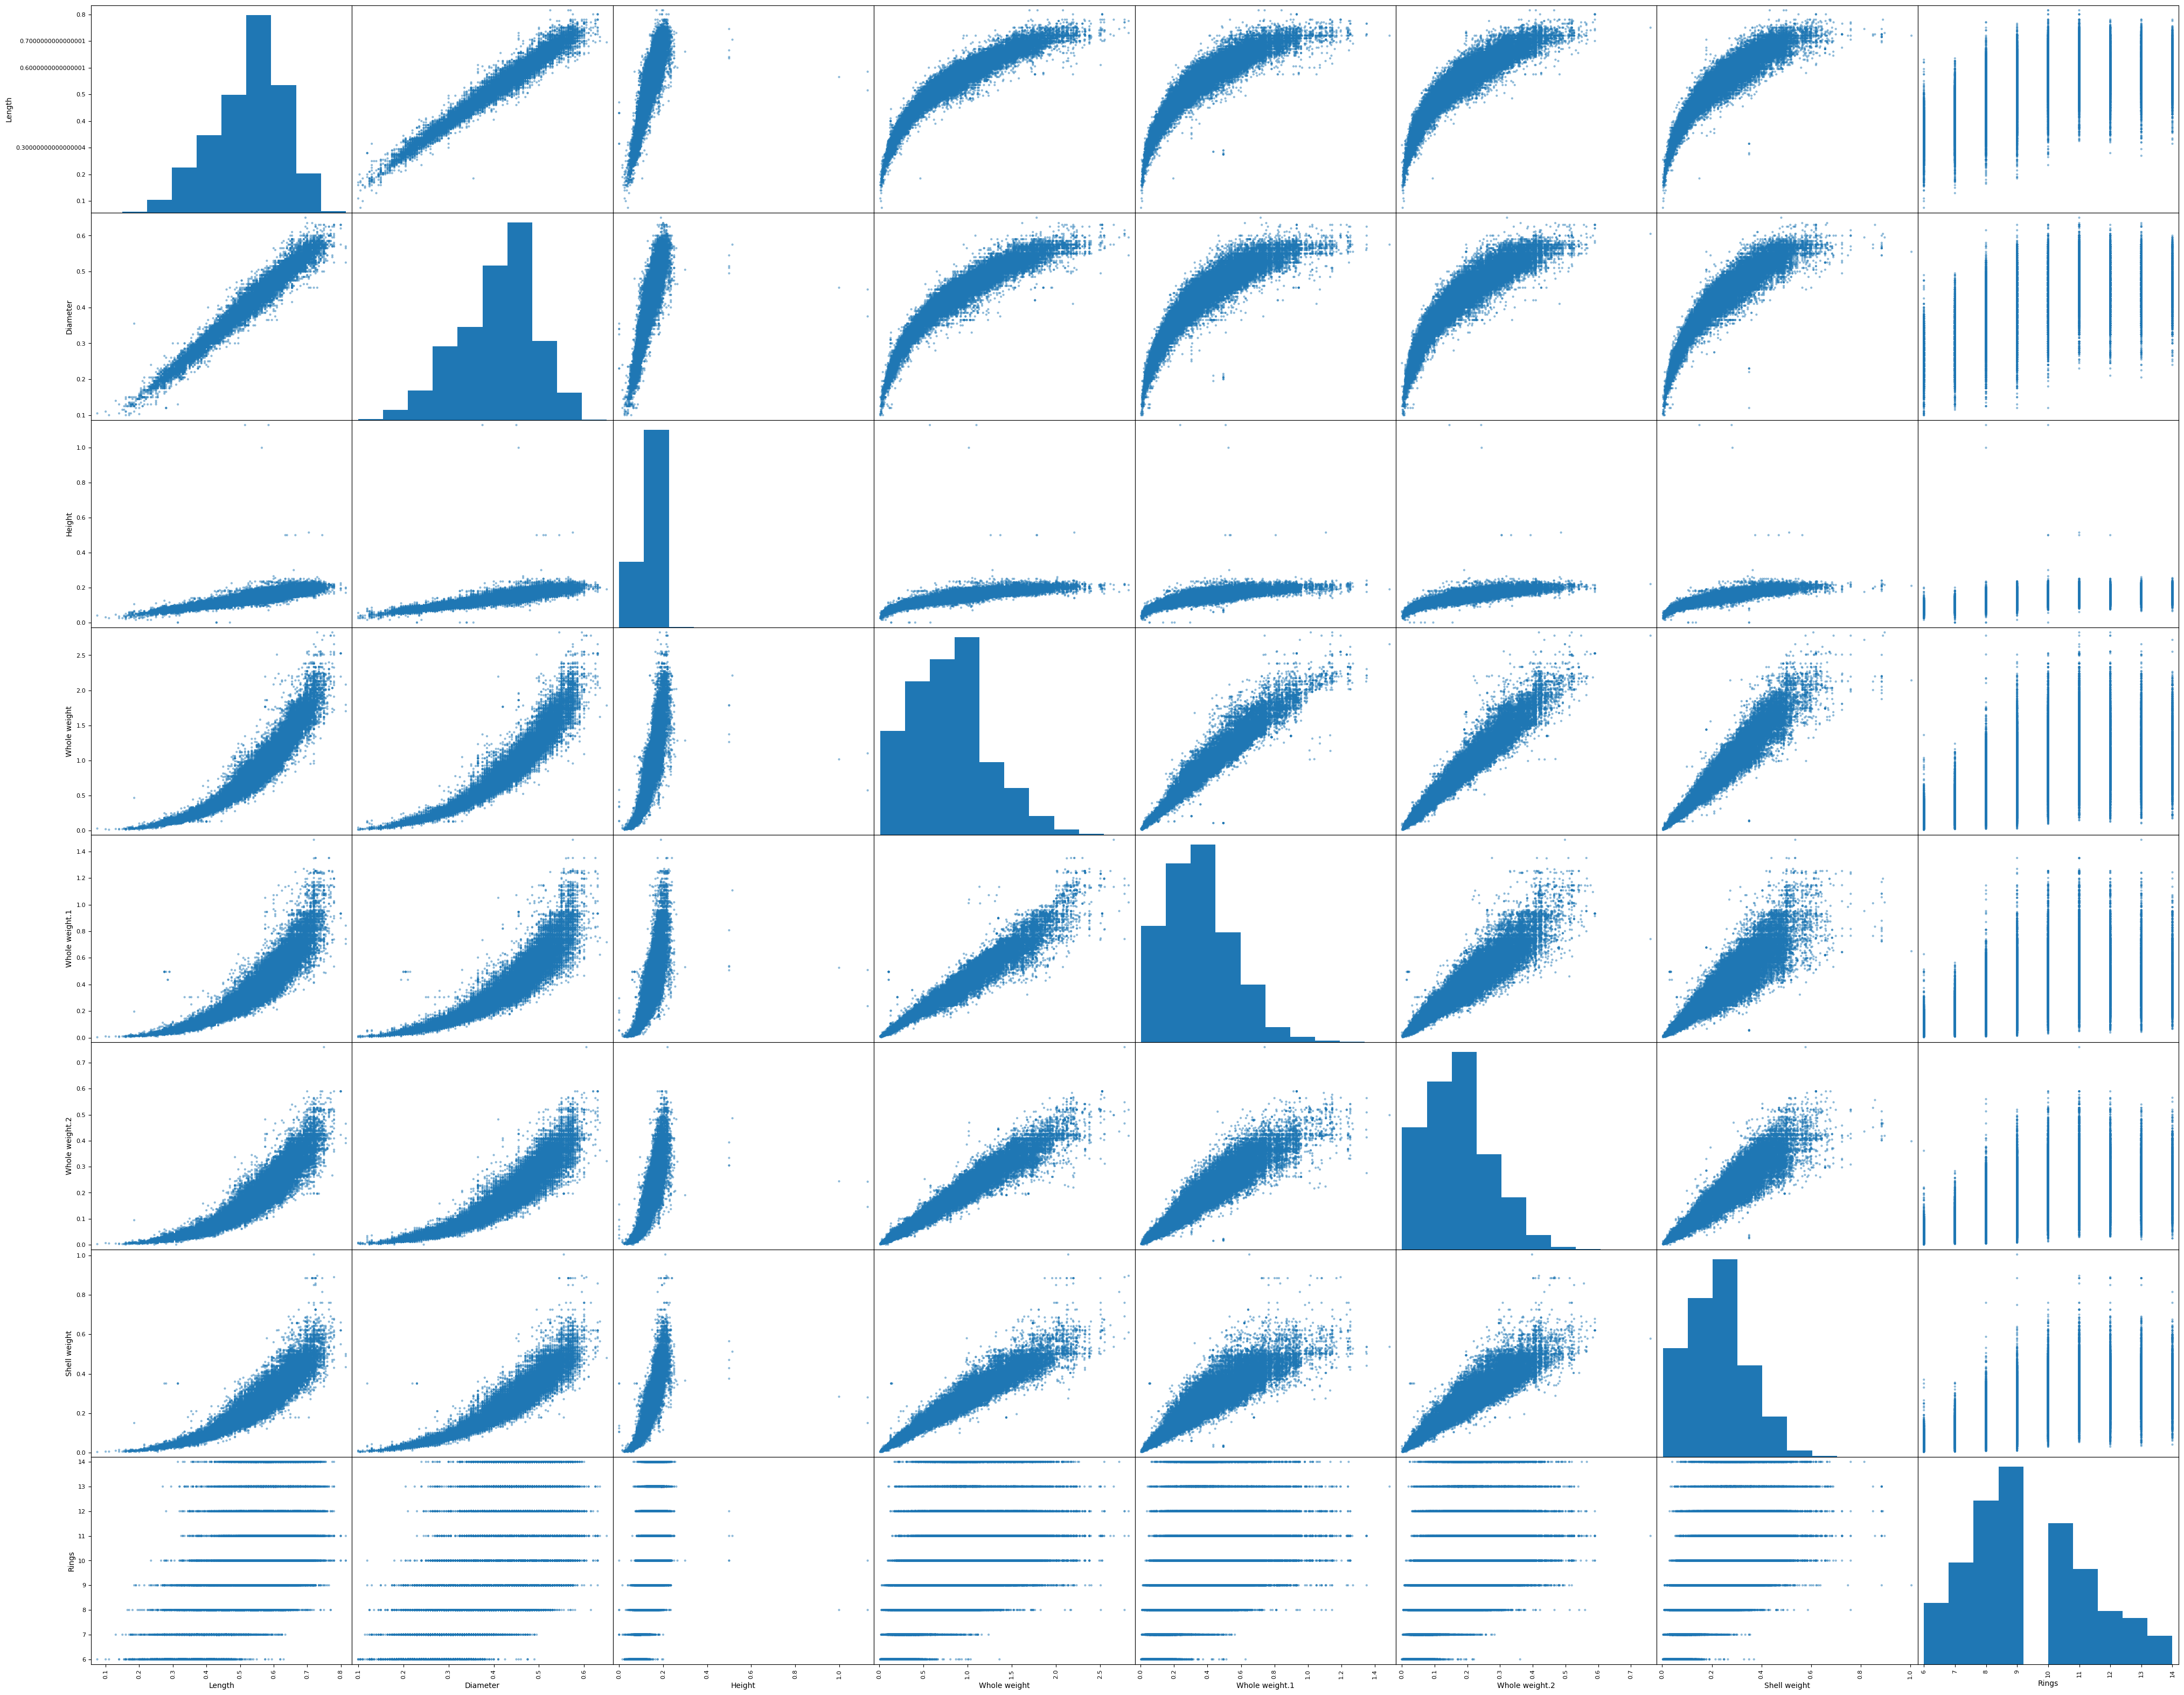

In [13]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(x,figsize=(50,40))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

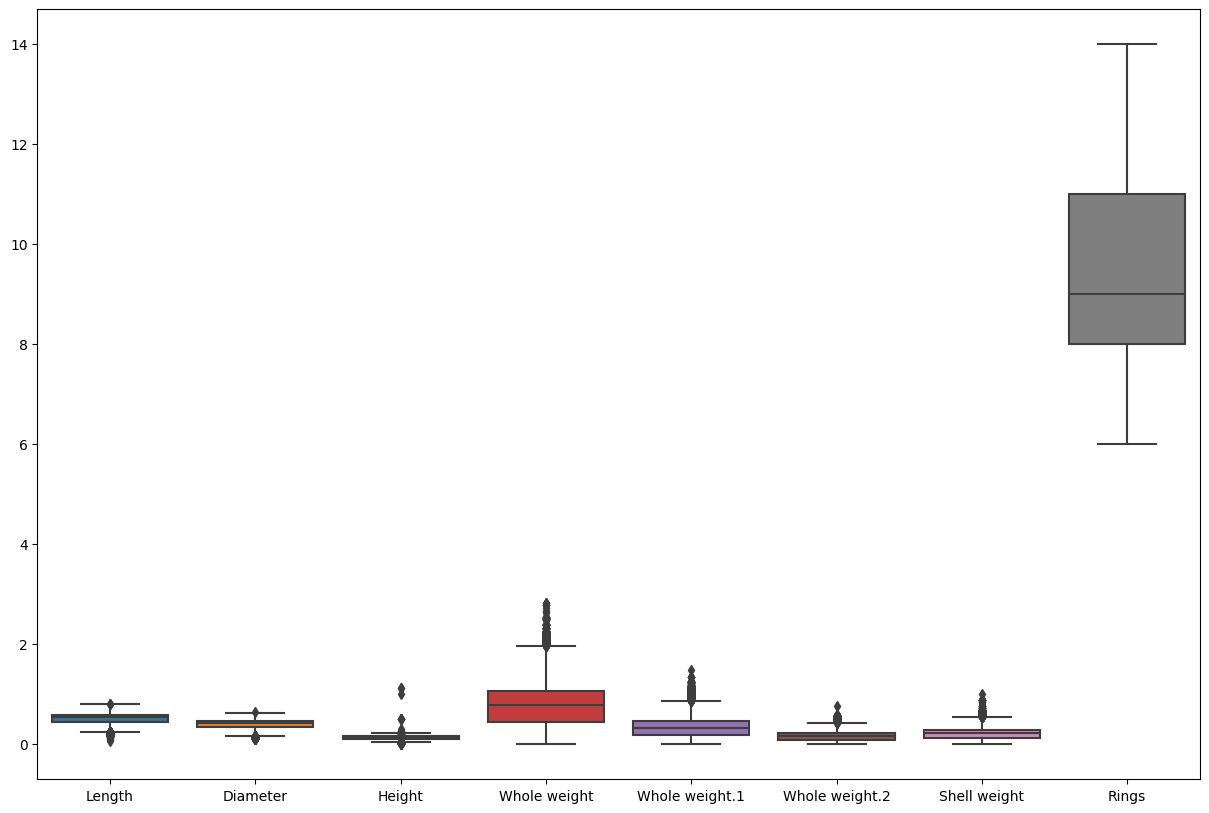

In [15]:
plt.figure(figsize=(15,10))
sns.boxplot(x)

# Modelling

In [16]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming 'X' contains your features and 'y' contains your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize LDA with 2 components
lda = LDA(n_components=2)

# Fit LDA and transform training data
X_train_lda = lda.fit_transform(X_train, y_train)

# Transform test data using the fitted LDA from training data
X_test_lda = lda.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the classifier on the reduced training data
svm_classifier.fit(X_train_lda, y_train)

# Predict the target variable for test data
y_pred = svm_classifier.predict(X_test_lda)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming 'lda' is your trained LDA model and 'X_test_lda' is your transformed test data

# Predict the target variable for test data using the trained LDA model
y_pred_lda = lda.predict(X_test_lda)

# Calculate accuracy of the LDA model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy of LDA:", accuracy_lda)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train.size,x_test.size

(439896, 188536)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis(n_components=2)
x_train_l=lda.fit_transform(x_train,y_train)

In [20]:
x_train_l

array([[-0.91052402,  0.40566126],
       [ 0.28527474,  0.56347936],
       [-0.98288183,  0.10615004],
       ...,
       [-0.48524418, -0.57297637],
       [-1.32332496, -3.76826961],
       [-0.68662274, -0.27346051]])

In [21]:
x_test_l=lda.transform(x_test)

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_l,y_train)

LogisticRegression()

In [24]:
y_pred=lr.predict(x_test_l)
y_pred

array(['M', 'I', 'I', ..., 'F', 'I', 'M'], dtype=object)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1569  870 4515]
 [  42 6999 1479]
 [1344 1487 5262]]


<IPython.core.display.Javascript object>

<Axes: >

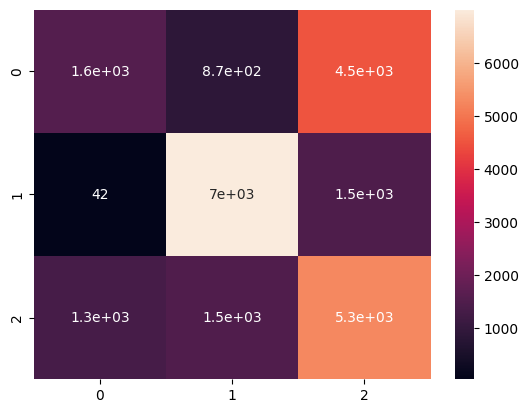

In [26]:
sns.heatmap(cm,annot=True)

In [27]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print("Accuracy=", acc*100, '%')

Accuracy= 58.683752705053685 %


In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_test_l,y_test)

KNeighborsClassifier()

In [29]:
y_pred=lr.predict(x_test_l)
y_pred

array(['M', 'I', 'I', ..., 'F', 'I', 'M'], dtype=object)